In [21]:
import pandas as pd
import datetime 
import psycopg2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from config import db_password

In [44]:
playlist_df = pd.read_csv(f'./Resources/playlist_df.csv', index_col=0)

In [47]:
playlist_df['duration_mins'] = pd.to_datetime(playlist_df['duration_ms'], unit='ms').dt.strftime('%H:%M:%S')

In [50]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins
0,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,00:02:47
1,0.733,0.670,5,-6.009,1,0.0751,0.12100,0.000000,0.1210,0.4720,100.964,audio_features,0O6u0VJ46W86TxN9wgyqDj,spotify:track:0O6u0VJ46W86TxN9wgyqDj,https://api.spotify.com/v1/tracks/0O6u0VJ46W86...,https://api.spotify.com/v1/audio-analysis/0O6u...,192841,4,00:03:12
2,0.686,0.507,1,-7.097,1,0.0357,0.62600,0.000075,0.3830,0.6900,168.955,audio_features,5CM4UuQ9Gnd6K2YyKGPMoK,spotify:track:5CM4UuQ9Gnd6K2YyKGPMoK,https://api.spotify.com/v1/tracks/5CM4UuQ9Gnd6...,https://api.spotify.com/v1/audio-analysis/5CM4...,232115,4,00:03:52
3,0.836,0.743,10,-6.305,0,0.0656,0.09950,0.000000,0.3350,0.7220,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,00:03:11
4,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,audio_features,4h9wh7iOZ0GGn8QVp4RAOB,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,https://api.spotify.com/v1/tracks/4h9wh7iOZ0GG...,https://api.spotify.com/v1/audio-analysis/4h9w...,148486,4,00:02:28
5,0.798,0.697,0,-7.139,1,0.0891,0.02020,0.000000,0.2590,0.7450,90.031,audio_features,0skYUMpS0AcbpjcGsAbRGj,spotify:track:0skYUMpS0AcbpjcGsAbRGj,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4,00:03:06
6,0.625,0.533,10,-11.903,0,0.0596,0.65900,0.002660,0.0546,0.1390,108.296,audio_features,29d0nY7TzCoi22XBqDQkiP,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4,00:05:00
7,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.5500,128.033,audio_features,2tTmW7RDtMQtBk7m2rYeSw,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,https://api.spotify.com/v1/tracks/2tTmW7RDtMQt...,https://api.spotify.com/v1/audio-analysis/2tTm...,198938,4,00:03:18
8,0.801,0.601,8,-7.574,0,0.2550,0.07770,0.000032,0.1450,0.7400,159.969,audio_features,0hquQWY3xvYqN4qtiquniF,spotify:track:0hquQWY3xvYqN4qtiquniF,https://api.spotify.com/v1/tracks/0hquQWY3xvYq...,https://api.spotify.com/v1/audio-analysis/0hqu...,182907,4,00:03:02
9,0.950,0.891,2,-2.653,1,0.2410,0.06450,0.000018,0.3090,0.9120,133.010,audio_features,4C6Uex2ILwJi9sZXRdmqXp,spotify:track:4C6Uex2ILwJi9sZXRdmqXp,https://api.spotify.com/v1/tracks/4C6Uex2ILwJi...,https://api.spotify.com/v1/audio-analysis/4C6U...,170977,4,00:02:50


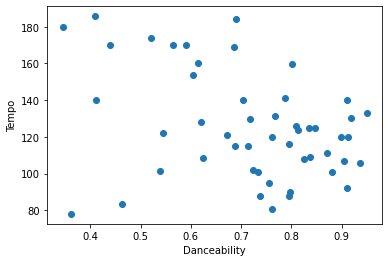

In [28]:
plt.scatter(playlist_df.danceability, playlist_df.tempo)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

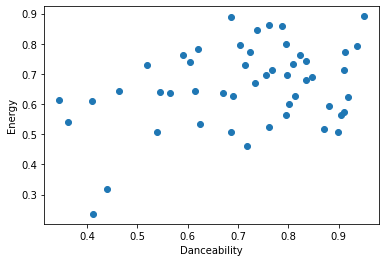

In [29]:
plt.scatter(playlist_df.danceability, playlist_df.energy)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

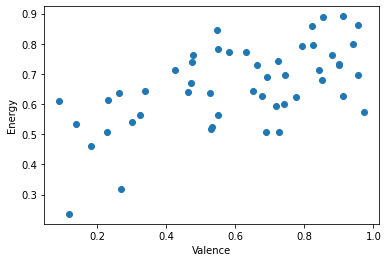

In [30]:
plt.scatter(playlist_df.valence, playlist_df.energy)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

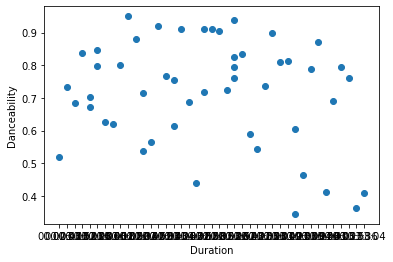

In [49]:
plt.scatter(playlist_df.duration_mins, playlist_df.danceability)
plt.xlabel('Duration')
plt.ylabel('Danceability')
plt.show()

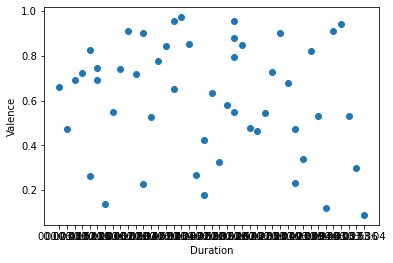

In [51]:
plt.scatter(playlist_df.duration_mins, playlist_df.valence)
plt.xlabel('Duration')
plt.ylabel('Valence')
plt.show()

## fetch from Postgres

In [24]:
#establishing the connection
conn = psycopg2.connect(
   database="playlist_db", user='postgres', password=db_password, host='127.0.0.1', port= '5433'
)

In [26]:
#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [27]:
#Retrieving data
cursor.execute('''
SELECT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
FROM features AS f
INNER JOIN playlists as p
ON f.uri = p.track_uri
''')

In [28]:
#Fetching 1st row from the table
result = cursor.fetchone();
print(result)

(0.798, 0.697, 0, -7.139, 1, 0.0891, 0.0202, 0.0, 0.259, 0.745, 90.031, 186964, 4, 87)


In [29]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

[(0.798, 0.697, 0, -7.139, 1, 0.0891, 0.0202, 0.0, 0.259, 0.745, 90.031, 186964, 4, 87), (0.798, 0.697, 0, -7.139, 1, 0.0891, 0.0202, 0.0, 0.259, 0.745, 90.031, 186964, 4, 87), (0.798, 0.697, 0, -7.139, 1, 0.0891, 0.0202, 0.0, 0.259, 0.745, 90.031, 186964, 4, 87), (0.733, 0.67, 5, -6.009, 1, 0.0751, 0.121, 0.0, 0.121, 0.472, 100.964, 192841, 4, 91), (0.733, 0.67, 5, -6.009, 1, 0.0751, 0.121, 0.0, 0.121, 0.472, 100.964, 192841, 4, 91), (0.52, 0.731, 6, -5.338, 0, 0.0557, 0.342, 0.00101, 0.311, 0.662, 173.93, 167303, 4, 96), (0.52, 0.731, 6, -5.338, 0, 0.0557, 0.342, 0.00101, 0.311, 0.662, 173.93, 167303, 4, 96), (0.52, 0.731, 6, -5.338, 0, 0.0557, 0.342, 0.00101, 0.311, 0.662, 173.93, 167303, 4, 96), (0.52, 0.731, 6, -5.338, 0, 0.0557, 0.342, 0.00101, 0.311, 0.662, 173.93, 167303, 4, 96), (0.704, 0.797, 0, -5.927, 1, 0.0475, 0.0826, 0.000745, 0.0546, 0.825, 139.994, 148486, 4, 93), (0.704, 0.797, 0, -5.927, 1, 0.0475, 0.0826, 0.000745, 0.0546, 0.825, 139.994, 148486, 4, 93), (0.704, 0.7

In [30]:
machine_learning_df = pd.DataFrame(result)

In [31]:
machine_learning_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,4,87
1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,4,87
2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,4,87
3,0.733,0.670,5,-6.009,1,0.0751,0.1210,0.0,0.121,0.472,100.964,192841,4,91
4,0.733,0.670,5,-6.009,1,0.0751,0.1210,0.0,0.121,0.472,100.964,192841,4,91


In [32]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6453 non-null   float64
 1   1       6453 non-null   float64
 2   2       6453 non-null   int64  
 3   3       6453 non-null   float64
 4   4       6453 non-null   int64  
 5   5       6453 non-null   float64
 6   6       6453 non-null   float64
 7   7       6453 non-null   float64
 8   8       6453 non-null   float64
 9   9       6453 non-null   float64
 10  10      6453 non-null   float64
 11  11      6453 non-null   int64  
 12  12      6453 non-null   int64  
 13  13      6453 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 705.9 KB


In [33]:
#Commit your changes in the database
# conn.commit()

#Closing the connection
conn.close()